### Data Dictionary

In this scenario, you are a Data Scientist working for a college basketball team. Your coaches have asked you to look at historical data to see which team metrics (individually or in combination) make a team more likely to make it into the Final Four. For example, if a team is more efficient defensively, does this have a direct relationship to their ability to get into the Final Four? What about defensively efficiency along with overall wins? Your job is to figure out if there is a combination of metrics that give a team more of a chance of making it into this tournament.

This dataset is about the performance of basketball teams. The __cbb.csv__ data set includes performance data about five seasons of 354 basketball teams. It includes following fields:

| Field          | Description                                                                           |
|----------------|---------------------------------------------------------------------------------------|
|TEAM |	The Division I college basketball school|
|CONF|	The Athletic Conference in which the school participates in (A10 = Atlantic 10, ACC = Atlantic Coast Conference, AE = America East, Amer = American, ASun = ASUN, B10 = Big Ten, B12 = Big 12, BE = Big East, BSky = Big Sky, BSth = Big South, BW = Big West, CAA = Colonial Athletic Association, CUSA = Conference USA, Horz = Horizon League, Ivy = Ivy League, MAAC = Metro Atlantic Athletic Conference, MAC = Mid-American Conference, MEAC = Mid-Eastern Athletic Conference, MVC = Missouri Valley Conference, MWC = Mountain West, NEC = Northeast Conference, OVC = Ohio Valley Conference, P12 = Pac-12, Pat = Patriot League, SB = Sun Belt, SC = Southern Conference, SEC = South Eastern Conference, Slnd = Southland Conference, Sum = Summit League, SWAC = Southwestern Athletic Conference, WAC = Western Athletic Conference, WCC = West Coast Conference)|
|G|	Number of games played|
|W|	Number of games won|
|ADJOE|	Adjusted Offensive Efficiency (An estimate of the offensive efficiency (points scored per 100 possessions) a team would have against the average Division I defense)|
|ADJDE|	Adjusted Defensive Efficiency (An estimate of the defensive efficiency (points allowed per 100 possessions) a team would have against the average Division I offense)|
|BARTHAG|	Power Rating (Chance of beating an average Division I team)|
|EFG_O|	Effective Field Goal Percentage Shot|
|EFG_D|	Effective Field Goal Percentage Allowed|
|TOR|	Turnover Percentage Allowed (Turnover Rate)|
|TORD|	Turnover Percentage Committed (Steal Rate)|
|ORB|	Offensive Rebound Percentage|
|DRB|	Defensive Rebound Percentage|
|FTR|	Free Throw Rate (How often the given team shoots Free Throws)|
|FTRD|	Free Throw Rate Allowed|
|2P_O|	Two-Point Shooting Percentage|
|2P_D|	Two-Point Shooting Percentage Allowed|
|3P_O|	Three-Point Shooting Percentage|
|3P_D|	Three-Point Shooting Percentage Allowed|
|ADJ_T|	Adjusted Tempo (An estimate of the tempo (possessions per 40 minutes) a team would have against the team that wants to play at an average Division I tempo)|
|WAB|	Wins Above Bubble (The bubble refers to the cut off between making the NCAA March Madness Tournament and not making it)|
|POSTSEASON|	Round where the given team was eliminated or where their season ended (R68 = First Four, R64 = Round of 64, R32 = Round of 32, S16 = Sweet Sixteen, E8 = Elite Eight, F4 = Final Four, 2ND = Runner-up, Champion = Winner of the NCAA March Madness Tournament for that given year)|
|SEED|	Seed in the NCAA March Madness Tournament|
|YEAR|	Season

### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

%matplotlib inline
sns.set_style('dark')
sns.set(font_scale=1.2)


import feature_engine.missing_data_imputers as mdi
from feature_engine.outlier_removers import Winsorizer

import warnings
warnings.filterwarnings('ignore')

import pickle
from pickle import dump, load

from pycaret.classification import *

pd.options.display.max_columns= None
#pd.options.display.max_rows = None

### Data Exploration

In [2]:
df = pd.read_csv("cbb.csv")

In [3]:
df

TEAM  CONF   G   W  ADJOE  ADJDE  BARTHAG  EFG_O  EFG_D   TOR  \
0     North Carolina   ACC  40  33  123.3   94.9   0.9531   52.6   48.1  15.4   
1          Villanova    BE  40  35  123.1   90.9   0.9703   56.1   46.7  16.3   
2         Notre Dame   ACC  36  24  118.3  103.3   0.8269   54.0   49.5  15.3   
3           Virginia   ACC  37  29  119.9   91.0   0.9600   54.8   48.4  15.1   
4             Kansas   B12  37  32  120.9   90.4   0.9662   55.7   45.1  17.8   
...              ...   ...  ..  ..    ...    ...      ...    ...    ...   ...   
1401         Houston  Amer  37  33  115.7   90.5   0.9439   52.1   42.5  16.5   
1402        Michigan   B10  37  30  114.6   85.6   0.9665   51.6   44.1  13.9   
1403          Oregon   P12  38  25  108.1   91.7   0.8687   52.0   46.4  17.8   
1404             LSU   SEC  35  28  117.9   96.6   0.9081   51.2   49.9  17.9   
1405       Tennessee   SEC  36  31  122.8   95.2   0.9488   55.3   48.1  15.8   

      TORD   ORB   DRB   FTR  FTRD  2P_O  2P_D  3P_O  3P_D  ADJ_T   WAB  \
0     18.2  40.7  30.0  32.3  30.4  53.9  44.6  32.7  36.2   71.7   8.6   
1     20.6  28.2  29.4  34.1  30.0  57.4  44.1  36.2  33.9   66.7   8.9   
2     14.8  32.7  32.1  32.9  26.0  52.9  46.5  37.4  36.9   65.5   2.3   
3     18.8  29.9  25.2  32.1  33.4  52.6  46.3  40.3  34.7   61.9   8.6   
4     18.5  32.2  27.9  38.6  37.3  52.7  43.4  41.3  32.5   70.1  11.6   
...    ...   ...   ...   ...   ...   ...   ...   ...   ...    ...   ...   
1401  18.2  34.4  26.0  31.6  37.3  51.3  43.0  35.5  27.9   67.3   7.8   
1402  18.0  24.7  24.8  27.5  24.1  51.8  44.3  34.2  29.1   65.9   9.2   
1403  20.9  29.6  28.8  29.4  33.9  51.6  48.8  35.1  29.0   65.4  -1.1   
1404  20.1  36.7  30.8  37.1  33.1  52.9  49.4  31.9  33.7   71.2   7.3   
1405  18.0  31.6  30.2  33.3  34.9  55.4  44.7  36.7  35.4   68.8   9.9   

     POSTSEASON  SEED  YEAR  
0           2ND   1.0  2016  
1     Champions   2.0  2016  
2            E8   6.0  2016  
3            E8   1.0  2016  
4            E8   1.0  2016  
...         ...   ...   ...  
1401        S16   3.0  2019  
1402        S16   2.0  2019  
1403        S16  12.0  2019  
1404        S16   3.0  2019  
1405        S16   2.0  2019  

[1406 rows x 24 columns]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1406 entries, 0 to 1405
Data columns (total 24 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   TEAM        1406 non-null   object 
 1   CONF        1406 non-null   object 
 2   G           1406 non-null   int64  
 3   W           1406 non-null   int64  
 4   ADJOE       1406 non-null   float64
 5   ADJDE       1406 non-null   float64
 6   BARTHAG     1406 non-null   float64
 7   EFG_O       1406 non-null   float64
 8   EFG_D       1406 non-null   float64
 9   TOR         1406 non-null   float64
 10  TORD        1406 non-null   float64
 11  ORB         1406 non-null   float64
 12  DRB         1406 non-null   float64
 13  FTR         1406 non-null   float64
 14  FTRD        1406 non-null   float64
 15  2P_O        1406 non-null   float64
 16  2P_D        1406 non-null   float64
 17  3P_O        1406 non-null   float64
 18  3P_D        1406 non-null   float64
 19  ADJ_T       1406 non-null  

In [5]:
df.describe(include='all')

TEAM  CONF            G            W        ADJOE  \
count               1406  1406  1406.000000  1406.000000  1406.000000   
unique               355    32          NaN          NaN          NaN   
top     Central Arkansas   ACC          NaN          NaN          NaN   
freq                   4    60          NaN          NaN          NaN   
mean                 NaN   NaN    31.570413    16.724751   103.848720   
std                  NaN   NaN     2.586927     6.492069     7.250998   
min                  NaN   NaN    24.000000     1.000000    82.900000   
25%                  NaN   NaN    30.000000    12.000000    98.900000   
50%                  NaN   NaN    31.000000    16.000000   103.400000   
75%                  NaN   NaN    33.000000    21.000000   108.300000   
max                  NaN   NaN    40.000000    37.000000   128.400000   

              ADJDE      BARTHAG        EFG_O        EFG_D          TOR  \
count   1406.000000  1406.000000  1406.000000  1406.000000  1406.000000   
unique          NaN          NaN          NaN          NaN          NaN   
top             NaN          NaN          NaN          NaN          NaN   
freq            NaN          NaN          NaN          NaN          NaN   
mean     103.849716     0.493272    50.406757    50.595448    18.458535   
std        6.422037     0.255095     3.042034     2.779066     1.949515   
min       85.200000     0.026600    40.000000    41.100000    13.500000   
25%       99.225000     0.281400    48.400000    48.800000    17.200000   
50%      104.000000     0.474000    50.400000    50.600000    18.400000   
75%      108.275000     0.711075    52.400000    52.400000    19.700000   
max      124.000000     0.974400    59.800000    59.500000    25.900000   

               TORD          ORB          DRB          FTR         FTRD  \
count   1406.000000  1406.000000  1406.000000  1406.000000  1406.000000   
unique          NaN          NaN          NaN          NaN          NaN   
top             NaN          NaN          NaN          NaN          NaN   
freq            NaN          NaN          NaN          NaN          NaN   
mean      18.391821    28.881223    29.062376    34.612233    34.885633   
std        2.082490     4.045938     2.963260     4.798377     5.735014   
min       10.200000    15.000000    18.400000    21.600000    21.800000   
25%       17.000000    26.200000    27.025000    31.300000    30.700000   
50%       18.300000    29.000000    28.900000    34.500000    34.300000   
75%       19.700000    31.600000    31.100000    37.800000    38.700000   
max       27.600000    42.000000    38.800000    49.400000    58.500000   

               2P_O         2P_D         3P_O         3P_D        ADJ_T  \
count   1406.000000  1406.000000  1406.000000  1406.000000  1406.000000   
unique          NaN          NaN          NaN          NaN          NaN   
top             NaN          NaN          NaN          NaN          NaN   
freq            NaN          NaN          NaN          NaN          NaN   
mean      49.486415    49.642745    34.662873    34.830228    69.292461   
std        3.366320     3.211512     2.670789     2.333992     2.771836   
min       37.700000    38.400000    26.700000    27.500000    60.300000   
25%       47.200000    47.525000    32.800000    33.200000    67.400000   
50%       49.400000    49.600000    34.600000    34.800000    69.200000   
75%       51.600000    51.775000    36.500000    36.400000    71.000000   
max       62.600000    61.200000    43.400000    43.100000    83.400000   

                WAB POSTSEASON        SEED         YEAR  
count   1406.000000        272  272.000000  1406.000000  
unique          NaN          8         NaN          NaN  
top             NaN        R64         NaN          NaN  
freq            NaN        128         NaN          NaN  
mean      -7.855121        NaN    8.790441  2017.502134  
std        7.001387        NaN    4.676650     1.119066  
min      -25.200000        NaN    

In [6]:
df.shape

(1406, 24)

In [7]:
df.columns

Index(['TEAM', 'CONF', 'G', 'W', 'ADJOE', 'ADJDE', 'BARTHAG', 'EFG_O', 'EFG_D',
       'TOR', 'TORD', 'ORB', 'DRB', 'FTR', 'FTRD', '2P_O', '2P_D', '3P_O',
       '3P_D', 'ADJ_T', 'WAB', 'POSTSEASON', 'SEED', 'YEAR'],
      dtype='object')

### Data Visualization

### Univariate Data Exploration

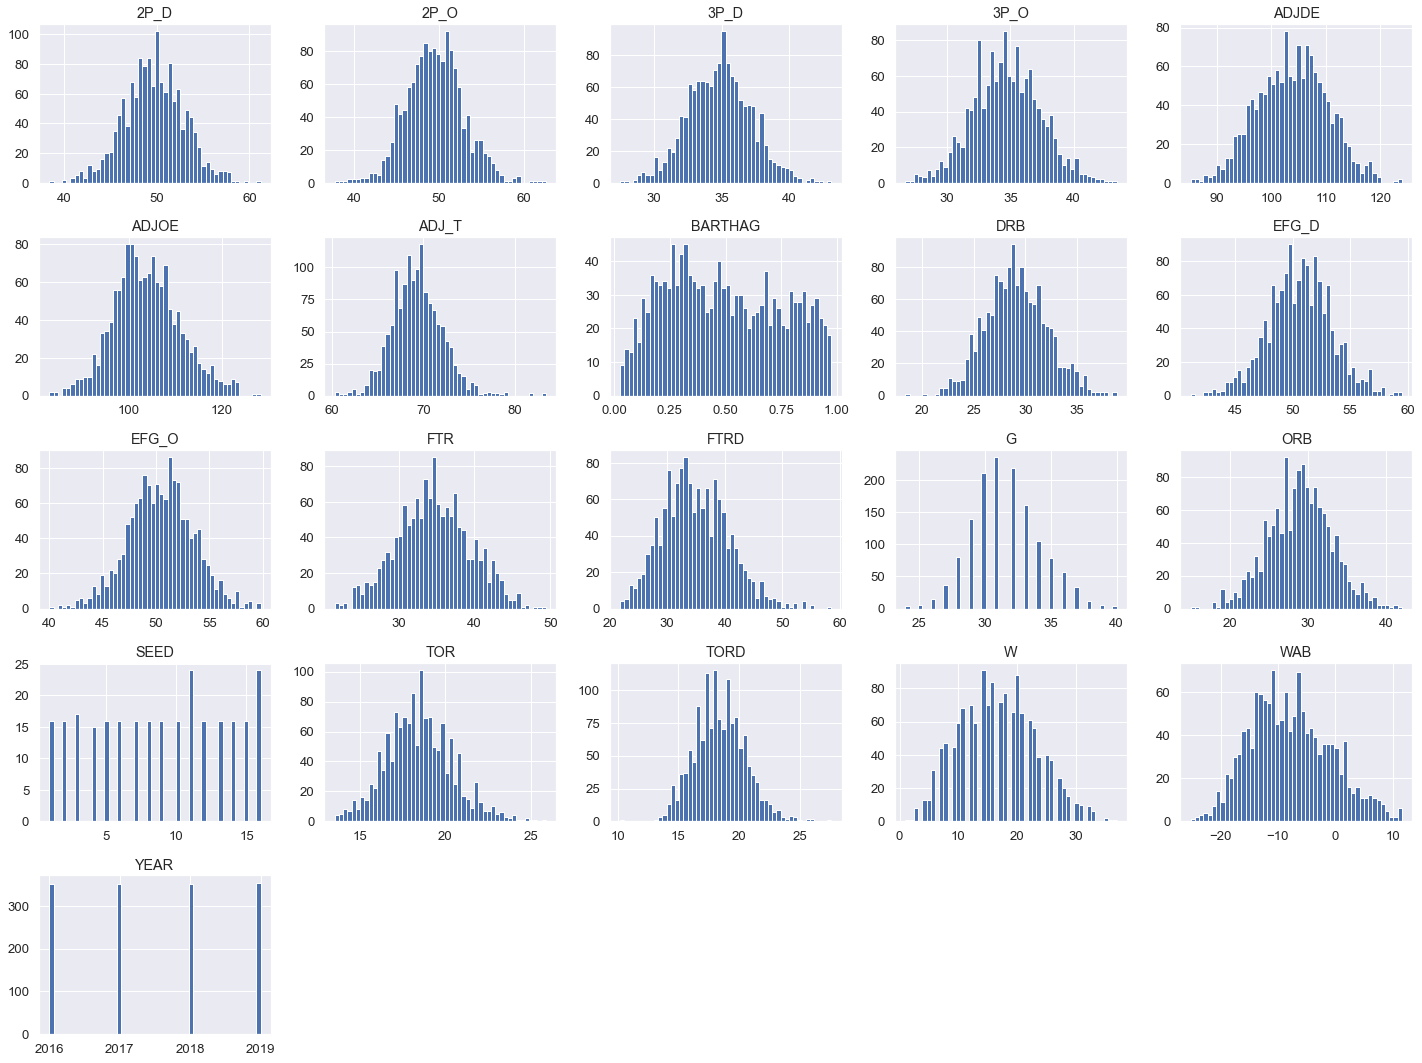

In [8]:
df.hist(bins=50, figsize=(20,15))
plt.tight_layout()
plt.show()

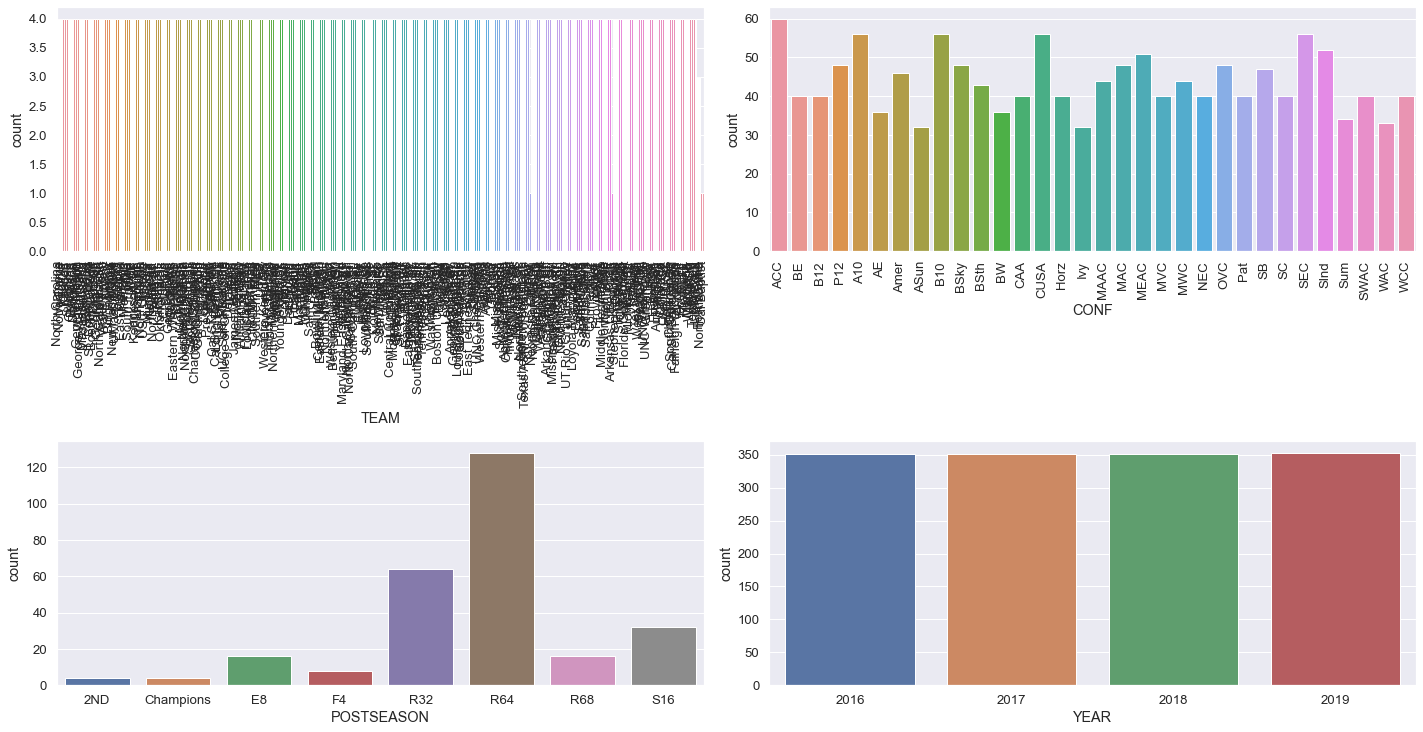

In [9]:
fig = plt.figure(figsize=(20,40))

plt.subplot(7,2,1)
plt.xticks(rotation=90)
sns.countplot(x=df.TEAM)

plt.subplot(7,2,2)
plt.xticks(rotation=90)
sns.countplot(x=df.CONF)

plt.subplot(7,2,3)
sns.countplot(df.POSTSEASON)

plt.subplot(7,2,4)
sns.countplot(df.YEAR)

plt.tight_layout()
plt.show()

### Bivariate Data Exploration

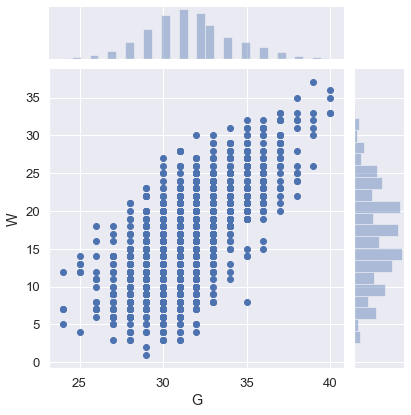

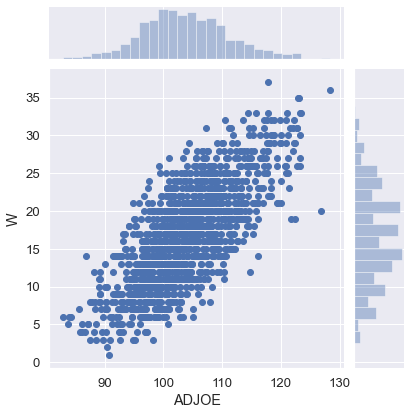

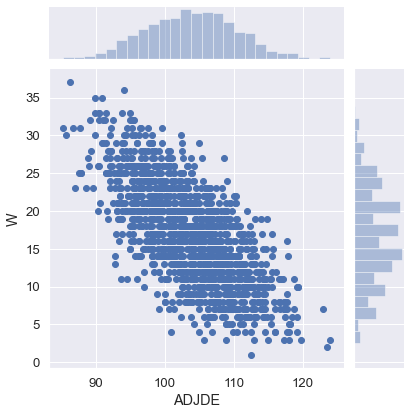

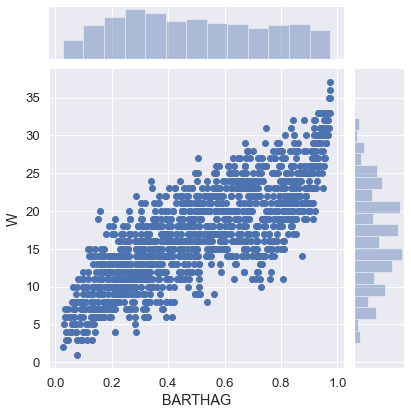

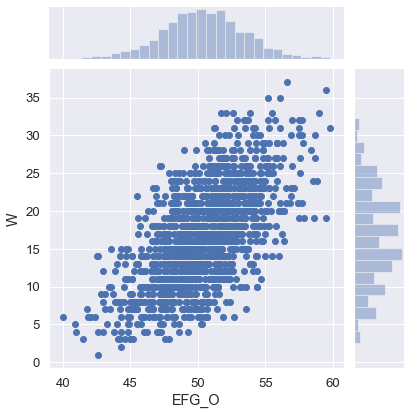

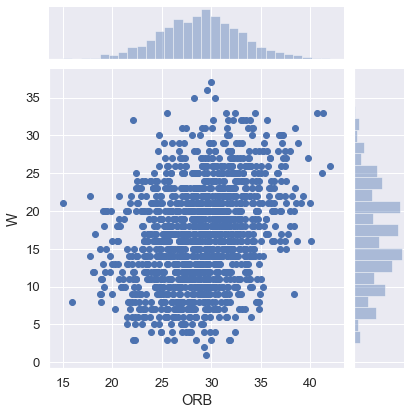

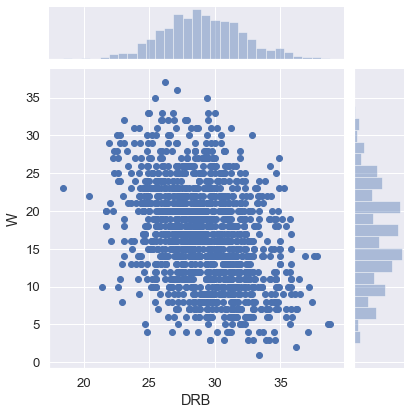

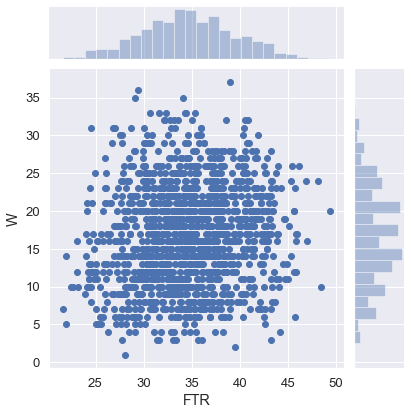

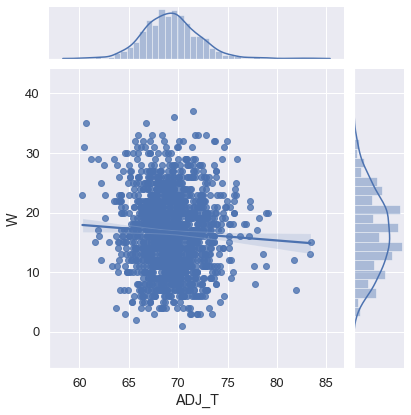

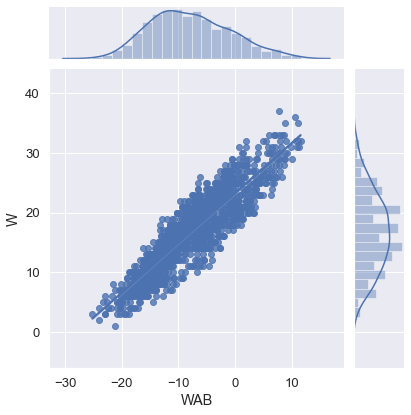

In [10]:
sns.jointplot(x='G', y='W',data=df, kind='scatter')

sns.jointplot(x='ADJOE', y='W',data=df, kind='scatter')

sns.jointplot(x='ADJDE', y='W',data=df, kind='scatter')

sns.jointplot(x='BARTHAG', y='W',data=df, kind='scatter')

sns.jointplot(x='EFG_O', y='W',data=df, kind='scatter')

sns.jointplot(x='ORB', y='W',data=df, kind='scatter')

sns.jointplot(x='DRB', y='W',data=df, kind='scatter')

sns.jointplot(x='FTR', y='W',data=df, kind='scatter')

sns.jointplot(x='ADJ_T', y='W',data=df, kind='reg')

sns.jointplot(x='WAB', y='W',data=df, kind='reg')


plt.show()

In [11]:
df.corr()

G         W     ADJOE     ADJDE   BARTHAG     EFG_O     EFG_D  \
G        1.000000  0.694294  0.610036 -0.606560  0.684179  0.351768 -0.489071   
W        0.694294  1.000000  0.740726 -0.697598  0.808328  0.624627 -0.629084   
ADJOE    0.610036  0.740726  1.000000 -0.541147  0.876854  0.733943 -0.350522   
ADJDE   -0.606560 -0.697598 -0.541147  1.000000 -0.855484 -0.262971  0.789522   
BARTHAG  0.684179  0.808328  0.876854 -0.855484  1.000000  0.566685 -0.632959   
EFG_O    0.351768  0.624627  0.733943 -0.262971  0.566685  1.000000 -0.169170   
EFG_D   -0.489071 -0.629084 -0.350522  0.789522 -0.632959 -0.169170  1.000000   
TOR     -0.324177 -0.437440 -0.584143  0.220306 -0.464304 -0.343668  0.109440   
TORD     0.070928  0.163512 -0.100177 -0.229428  0.059057 -0.128320  0.002917   
ORB      0.276452  0.315491  0.289171 -0.274805  0.316404 -0.105013 -0.311194   
DRB     -0.168511 -0.362473 -0.243611  0.381923 -0.343430 -0.310620  0.233499   
FTR      0.093426  0.127848  0.072360 -0.099570  0.105572 -0.077106 -0.177110   
FTRD    -0.277845 -0.310100 -0.372815  0.195381 -0.328662 -0.403423  0.126941   
2P_O     0.343096  0.586644  0.637790 -0.286613  0.526996  0.887056 -0.192840   
2P_D    -0.446854 -0.542603 -0.346566  0.722451 -0.593379 -0.148363  0.901366   
3P_O     0.220460  0.432303  0.578285 -0.132148  0.401678  0.754215 -0.076390   
3P_D    -0.348541 -0.500085 -0.201922  0.560496 -0.423502 -0.129869  0.723797   
ADJ_T   -0.073626 -0.056288  0.039005  0.216587 -0.092839  0.039121  0.207273   
WAB      0.665949  0.901692  0.852331 -0.816995  0.943035  0.578435 -0.641557   
SEED    -0.605589 -0.579559 -0.803857  0.699601 -0.827624 -0.310675  0.385737   
YEAR     0.042113  0.073508 -0.016709 -0.018837  0.001464  0.108600  0.116721   

              TOR      TORD       ORB       DRB       FTR      FTRD      2P_O  \
G       -0.324177  0.070928  0.276452 -0.168511  0.093426 -0.277845  0.343096   
W       -0.437440  0.163512  0.315491 -0.362473  0.127848 -0.310100  0.586644   
ADJOE   -0.584143 -0.100177  0.289171 -0.243611  0.072360 -0.372815  0.637790   
ADJDE    0.220306 -0.229428 -0.274805  0.381923 -0.099570  0.195381 -0.286613   
BARTHAG -0.464304  0.059057  0.316404 -0.343430  0.105572 -0.328662  0.526996   
EFG_O   -0.343668 -0.128320 -0.105013 -0.310620 -0.077106 -0.403423  0.887056   
EFG_D    0.109440  0.002917 -0.311194  0.233499 -0.177110  0.126941 -0.192840   
TOR      1.000000  0.082966  0.127515  0.142924  0.133536  0.295218 -0.259642   
TORD     0.082966  1.000000  0.107461  0.261749  0.093449  0.380354 -0.066384   
ORB      0.127515  0.107461  1.000000 -0.011514  0.261221  0.116237 -0.051205   
DRB      0.142924  0.261749 -0.011514  1.000000  0.063573  0.209985 -0.282591   
FTR      0.133536  0.093449  0.261221  0.063573  1.000000  0.202800 -0.029459   
FTRD     0.295218  0.380354  0.116237  0.209985  0.202800  1.000000 -0.390162   
2P_O    -0.259642 -0.066384 -0.051205 -0.282591 -0.029459 -0.390162  1.000000   
2P_D     0.097793  0.055925 -0.314253  0.240275 -0.173371  0.111617 -0.156709   
3P_O    -0.315127 -0.155566 -0.111172 -0.223843 -0.096331 -0.254971  0.377605   
3P_D     0.071761 -0.101289 -0.175745  0.130546 -0.096385  0.102307 -0.169483   
ADJ_T   -0.042741 -0.004097 -0.016860  0.215007  0.195328  0.092148  0.078710   
WAB     -0.453637  0.107251  0.342269 -0.308396  0.139299 -0.326459  0.539533   
SEED     0.266268  0.080201 -0.327773  0.105448  0.134524  0.260131 -0.247600   
YEAR     0.064392  0.056249 -0.129806 -0.180751 -0.299391 -0.254989  0.161103   

             2P_D      3P_O      3P_D     ADJ_T       WAB      SEED      YEAR  
G       -0.446854  0.220460 -0.348541 -0.073626  0.665949 -0.605589  0.042113  
W       -0.542603  0.432303 -0.500085 -0.056288  0.901692 -0.579559  0.073508  
ADJOE   -0.346566  0.578285 -0.201922  0.039005  0.852331 -0.803857 -0.016709  
ADJDE    0.722451 -0.132148  0.560496  0.216587 -0.816995  0.699601 -0.018837  
BARTHAG -0.593379  0.401678 -0.423502 -0.092839  0

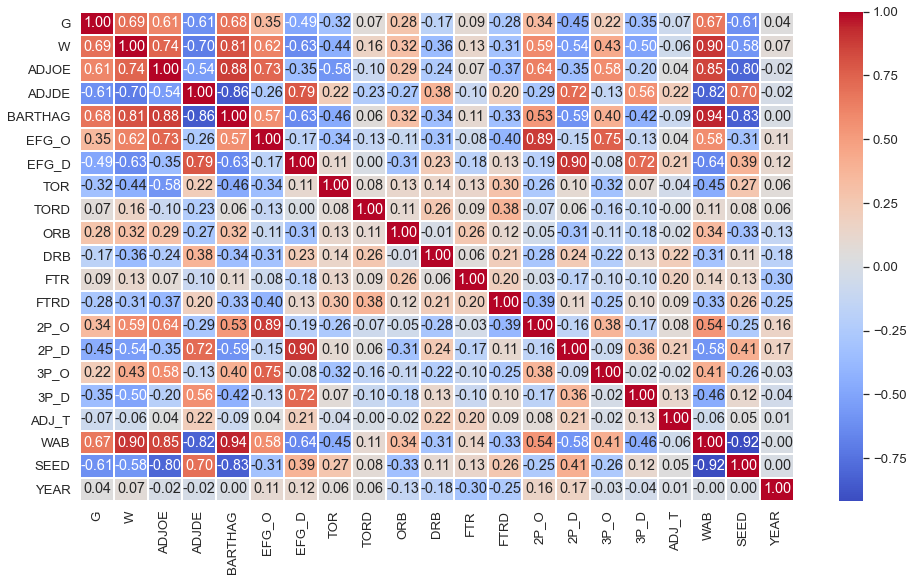

In [12]:
plt.figure(figsize=(16,9))
sns.heatmap(df.corr(),cmap="coolwarm",annot=True,fmt='.2f',linewidths=1)
plt.show()

### Data Preprocessing

### Treat Missing Values

In [13]:
df.isnull().sum()

TEAM             0
CONF             0
G                0
W                0
ADJOE            0
ADJDE            0
BARTHAG          0
EFG_O            0
EFG_D            0
TOR              0
TORD             0
ORB              0
DRB              0
FTR              0
FTRD             0
2P_O             0
2P_D             0
3P_O             0
3P_D             0
ADJ_T            0
WAB              0
POSTSEASON    1134
SEED          1134
YEAR             0
dtype: int64

In [14]:
df['POSTSEASON'].value_counts()

R64          128
R32           64
S16           32
E8            16
R68           16
F4             8
2ND            4
Champions      4
Name: POSTSEASON, dtype: int64

In [15]:
df['POSTSEASON'].count()

272

In [16]:
1406-272

1134

In [17]:
df['SEED'].value_counts()

16.0    24
11.0    24
3.0     17
5.0     16
14.0    16
12.0    16
15.0    16
13.0    16
7.0     16
9.0     16
8.0     16
10.0    16
6.0     16
2.0     16
1.0     16
4.0     15
Name: SEED, dtype: int64

In [18]:
df.dropna(inplace=True)

In [19]:
df.isnull().sum()

TEAM          0
CONF          0
G             0
W             0
ADJOE         0
ADJDE         0
BARTHAG       0
EFG_O         0
EFG_D         0
TOR           0
TORD          0
ORB           0
DRB           0
FTR           0
FTRD          0
2P_O          0
2P_D          0
3P_O          0
3P_D          0
ADJ_T         0
WAB           0
POSTSEASON    0
SEED          0
YEAR          0
dtype: int64

In [20]:
df.reset_index(inplace=True, drop=True)

In [21]:
df

TEAM  CONF   G   W  ADJOE  ADJDE  BARTHAG  EFG_O  EFG_D   TOR  \
0    North Carolina   ACC  40  33  123.3   94.9   0.9531   52.6   48.1  15.4   
1         Villanova    BE  40  35  123.1   90.9   0.9703   56.1   46.7  16.3   
2        Notre Dame   ACC  36  24  118.3  103.3   0.8269   54.0   49.5  15.3   
3          Virginia   ACC  37  29  119.9   91.0   0.9600   54.8   48.4  15.1   
4            Kansas   B12  37  32  120.9   90.4   0.9662   55.7   45.1  17.8   
..              ...   ...  ..  ..    ...    ...      ...    ...    ...   ...   
267         Houston  Amer  37  33  115.7   90.5   0.9439   52.1   42.5  16.5   
268        Michigan   B10  37  30  114.6   85.6   0.9665   51.6   44.1  13.9   
269          Oregon   P12  38  25  108.1   91.7   0.8687   52.0   46.4  17.8   
270             LSU   SEC  35  28  117.9   96.6   0.9081   51.2   49.9  17.9   
271       Tennessee   SEC  36  31  122.8   95.2   0.9488   55.3   48.1  15.8   

     TORD   ORB   DRB   FTR  FTRD  2P_O  2P_D  3P_O  3P_D  ADJ_T   WAB  \
0    18.2  40.7  30.0  32.3  30.4  53.9  44.6  32.7  36.2   71.7   8.6   
1    20.6  28.2  29.4  34.1  30.0  57.4  44.1  36.2  33.9   66.7   8.9   
2    14.8  32.7  32.1  32.9  26.0  52.9  46.5  37.4  36.9   65.5   2.3   
3    18.8  29.9  25.2  32.1  33.4  52.6  46.3  40.3  34.7   61.9   8.6   
4    18.5  32.2  27.9  38.6  37.3  52.7  43.4  41.3  32.5   70.1  11.6   
..    ...   ...   ...   ...   ...   ...   ...   ...   ...    ...   ...   
267  18.2  34.4  26.0  31.6  37.3  51.3  43.0  35.5  27.9   67.3   7.8   
268  18.0  24.7  24.8  27.5  24.1  51.8  44.3  34.2  29.1   65.9   9.2   
269  20.9  29.6  28.8  29.4  33.9  51.6  48.8  35.1  29.0   65.4  -1.1   
270  20.1  36.7  30.8  37.1  33.1  52.9  49.4  31.9  33.7   71.2   7.3   
271  18.0  31.6  30.2  33.3  34.9  55.4  44.7  36.7  35.4   68.8   9.9   

    POSTSEASON  SEED  YEAR  
0          2ND   1.0  2016  
1    Champions   2.0  2016  
2           E8   6.0  2016  
3           E8   1.0  2016  
4           E8   1.0  2016  
..         ...   ...   ...  
267        S16   3.0  2019  
268        S16   2.0  2019  
269        S16  12.0  2019  
270        S16   3.0  2019  
271        S16   2.0  2019  

[272 rows x 24 columns]

In [22]:
df1 = df.copy()

In [23]:
df1

TEAM  CONF   G   W  ADJOE  ADJDE  BARTHAG  EFG_O  EFG_D   TOR  \
0    North Carolina   ACC  40  33  123.3   94.9   0.9531   52.6   48.1  15.4   
1         Villanova    BE  40  35  123.1   90.9   0.9703   56.1   46.7  16.3   
2        Notre Dame   ACC  36  24  118.3  103.3   0.8269   54.0   49.5  15.3   
3          Virginia   ACC  37  29  119.9   91.0   0.9600   54.8   48.4  15.1   
4            Kansas   B12  37  32  120.9   90.4   0.9662   55.7   45.1  17.8   
..              ...   ...  ..  ..    ...    ...      ...    ...    ...   ...   
267         Houston  Amer  37  33  115.7   90.5   0.9439   52.1   42.5  16.5   
268        Michigan   B10  37  30  114.6   85.6   0.9665   51.6   44.1  13.9   
269          Oregon   P12  38  25  108.1   91.7   0.8687   52.0   46.4  17.8   
270             LSU   SEC  35  28  117.9   96.6   0.9081   51.2   49.9  17.9   
271       Tennessee   SEC  36  31  122.8   95.2   0.9488   55.3   48.1  15.8   

     TORD   ORB   DRB   FTR  FTRD  2P_O  2P_D  3P_O  3P_D  ADJ_T   WAB  \
0    18.2  40.7  30.0  32.3  30.4  53.9  44.6  32.7  36.2   71.7   8.6   
1    20.6  28.2  29.4  34.1  30.0  57.4  44.1  36.2  33.9   66.7   8.9   
2    14.8  32.7  32.1  32.9  26.0  52.9  46.5  37.4  36.9   65.5   2.3   
3    18.8  29.9  25.2  32.1  33.4  52.6  46.3  40.3  34.7   61.9   8.6   
4    18.5  32.2  27.9  38.6  37.3  52.7  43.4  41.3  32.5   70.1  11.6   
..    ...   ...   ...   ...   ...   ...   ...   ...   ...    ...   ...   
267  18.2  34.4  26.0  31.6  37.3  51.3  43.0  35.5  27.9   67.3   7.8   
268  18.0  24.7  24.8  27.5  24.1  51.8  44.3  34.2  29.1   65.9   9.2   
269  20.9  29.6  28.8  29.4  33.9  51.6  48.8  35.1  29.0   65.4  -1.1   
270  20.1  36.7  30.8  37.1  33.1  52.9  49.4  31.9  33.7   71.2   7.3   
271  18.0  31.6  30.2  33.3  34.9  55.4  44.7  36.7  35.4   68.8   9.9   

    POSTSEASON  SEED  YEAR  
0          2ND   1.0  2016  
1    Champions   2.0  2016  
2           E8   6.0  2016  
3           E8   1.0  2016  
4           E8   1.0  2016  
..         ...   ...   ...  
267        S16   3.0  2019  
268        S16   2.0  2019  
269        S16  12.0  2019  
270        S16   3.0  2019  
271        S16   2.0  2019  

[272 rows x 24 columns]

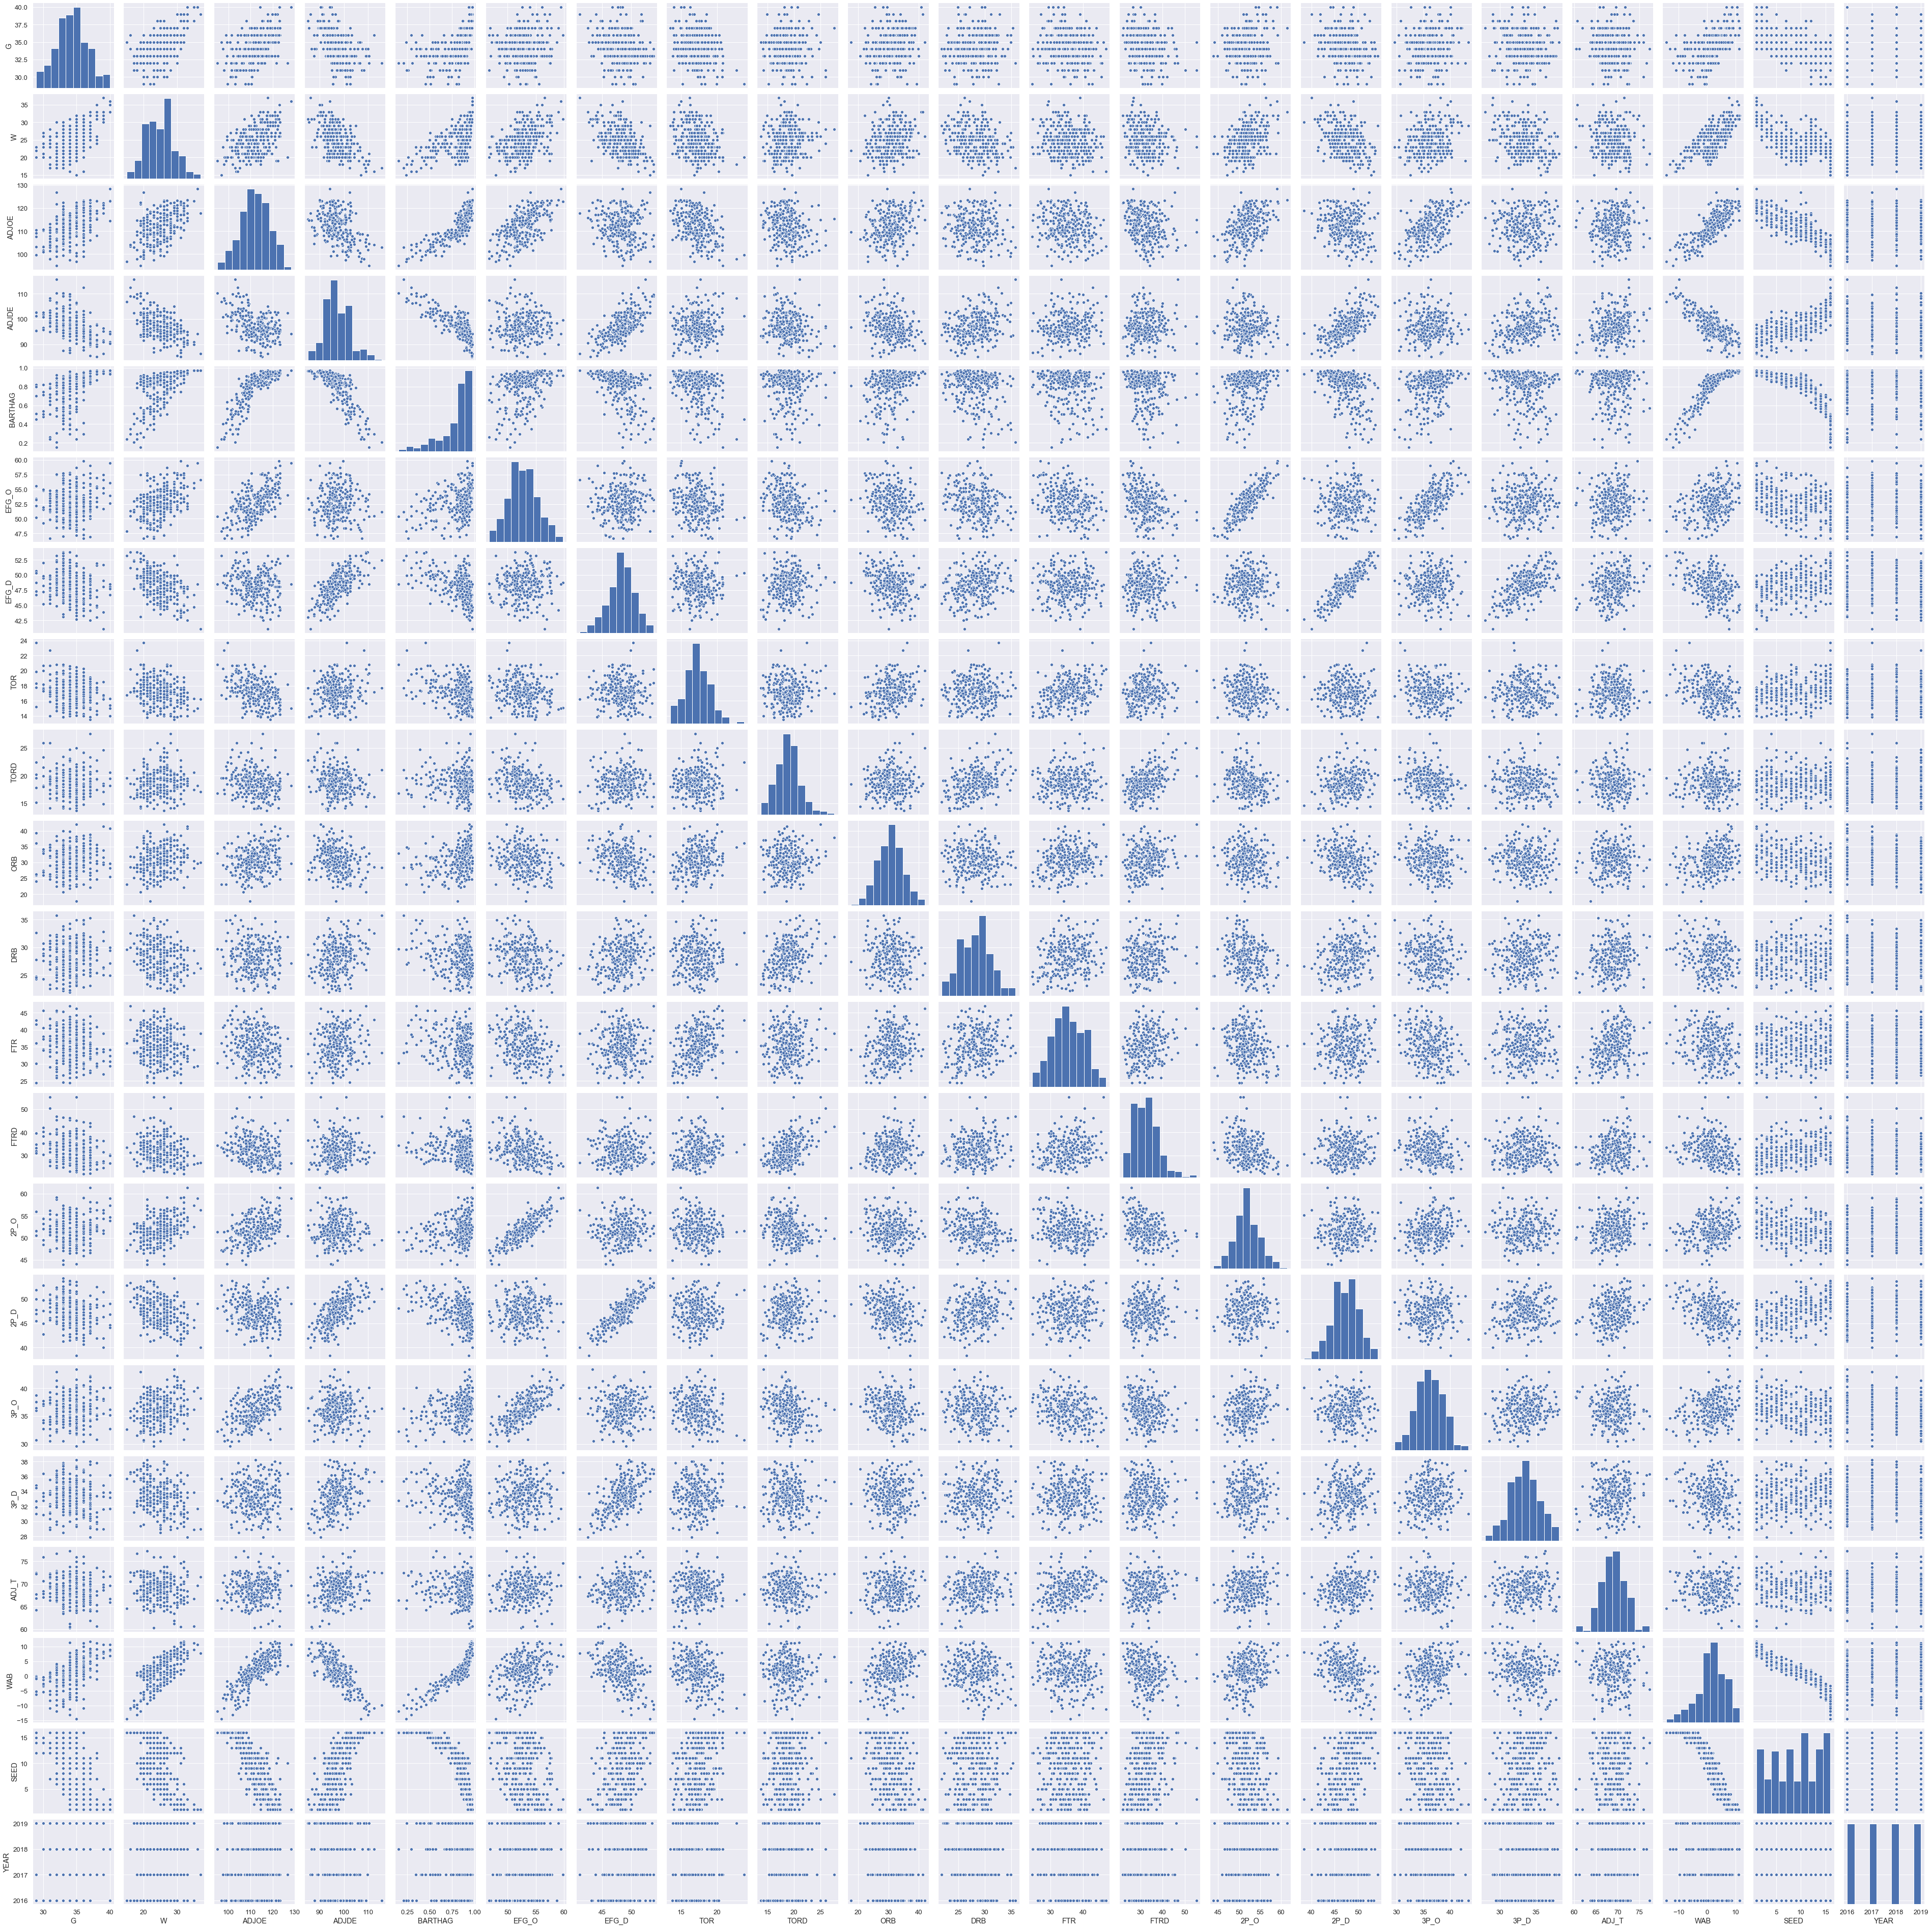

In [24]:
sns.pairplot(df1)
plt.show()

### Treat Duplicate Values

In [25]:
df1.duplicated(keep='first').sum()

0

### Drop unwanted features

In [26]:
df1.columns

Index(['TEAM', 'CONF', 'G', 'W', 'ADJOE', 'ADJDE', 'BARTHAG', 'EFG_O', 'EFG_D',
       'TOR', 'TORD', 'ORB', 'DRB', 'FTR', 'FTRD', '2P_O', '2P_D', '3P_O',
       '3P_D', 'ADJ_T', 'WAB', 'POSTSEASON', 'SEED', 'YEAR'],
      dtype='object')

In [27]:
df1.drop(['TEAM', 'CONF','YEAR'],axis=1, inplace=True)

In [28]:
df1

G   W  ADJOE  ADJDE  BARTHAG  EFG_O  EFG_D   TOR  TORD   ORB   DRB  \
0    40  33  123.3   94.9   0.9531   52.6   48.1  15.4  18.2  40.7  30.0   
1    40  35  123.1   90.9   0.9703   56.1   46.7  16.3  20.6  28.2  29.4   
2    36  24  118.3  103.3   0.8269   54.0   49.5  15.3  14.8  32.7  32.1   
3    37  29  119.9   91.0   0.9600   54.8   48.4  15.1  18.8  29.9  25.2   
4    37  32  120.9   90.4   0.9662   55.7   45.1  17.8  18.5  32.2  27.9   
..   ..  ..    ...    ...      ...    ...    ...   ...   ...   ...   ...   
267  37  33  115.7   90.5   0.9439   52.1   42.5  16.5  18.2  34.4  26.0   
268  37  30  114.6   85.6   0.9665   51.6   44.1  13.9  18.0  24.7  24.8   
269  38  25  108.1   91.7   0.8687   52.0   46.4  17.8  20.9  29.6  28.8   
270  35  28  117.9   96.6   0.9081   51.2   49.9  17.9  20.1  36.7  30.8   
271  36  31  122.8   95.2   0.9488   55.3   48.1  15.8  18.0  31.6  30.2   

      FTR  FTRD  2P_O  2P_D  3P_O  3P_D  ADJ_T   WAB POSTSEASON  SEED  
0    32.3  30.4  53.9  44.6  32.7  36.2   71.7   8.6        2ND   1.0  
1    34.1  30.0  57.4  44.1  36.2  33.9   66.7   8.9  Champions   2.0  
2    32.9  26.0  52.9  46.5  37.4  36.9   65.5   2.3         E8   6.0  
3    32.1  33.4  52.6  46.3  40.3  34.7   61.9   8.6         E8   1.0  
4    38.6  37.3  52.7  43.4  41.3  32.5   70.1  11.6         E8   1.0  
..    ...   ...   ...   ...   ...   ...    ...   ...        ...   ...  
267  31.6  37.3  51.3  43.0  35.5  27.9   67.3   7.8        S16   3.0  
268  27.5  24.1  51.8  44.3  34.2  29.1   65.9   9.2        S16   2.0  
269  29.4  33.9  51.6  48.8  35.1  29.0   65.4  -1.1        S16  12.0  
270  37.1  33.1  52.9  49.4  31.9  33.7   71.2   7.3        S16   3.0  
271  33.3  34.9  55.4  44.7  36.7  35.4   68.8   9.9        S16   2.0  

[272 rows x 21 columns]

### Create and save processed dataset

In [29]:
#df1.to_csv("basketfinal.csv",index=False)

### Model Training

### Using PyCaret

In [30]:
exp_class = setup(data = df1, target = 'POSTSEASON', session_id=123, normalize=True, numeric_features=['G']) 

 
Setup Succesfully Completed!


In [31]:
compare_models()

### Build a KNN model using a value of k equals five

In [32]:
knn = create_model('knn')

Accuracy  AUC  Recall   Prec.      F1   Kappa
0       0.4737  0.0  0.2269  0.4737  0.4737  0.2460
1       0.4737  0.0  0.2698  0.3233  0.3822  0.1518
2       0.5789  0.0  0.4463  0.5470  0.5501  0.3362
3       0.4211  0.0  0.2130  0.2814  0.3365  0.1144
4       0.6316  0.0  0.2000  0.5526  0.5815  0.4242
5       0.3158  0.0  0.1907  0.3816  0.3192  0.0573
6       0.6316  0.0  0.5333  0.5135  0.5328  0.4458
7       0.4737  0.0  0.1984  0.3126  0.3746  0.1739
8       0.4737  0.0  0.1984  0.3441  0.3971  0.1739
9       0.4211  0.0  0.1270  0.2707  0.3295  0.0369
Mean    0.4895  0.0  0.2604  0.4000  0.4277  0.2160
SD      0.0943  0.0  0.1210  0.1054  0.0935  0.1367

In [33]:
print(knn)

OneVsRestClassifier(estimator=KNeighborsClassifier(algorithm='auto',
                                                   leaf_size=30,
                                                   metric='minkowski',
                                                   metric_params=None,
                                                   n_jobs=None, n_neighbors=5,
                                                   p=2, weights='uniform'),
                    n_jobs=None)


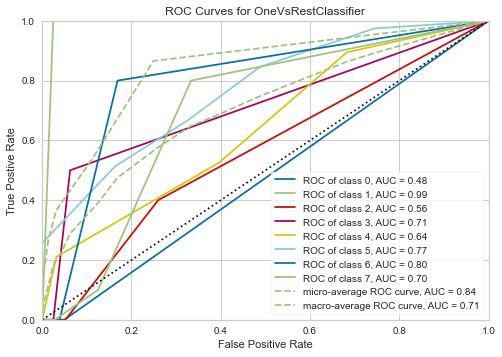

In [34]:
plot_model(knn)

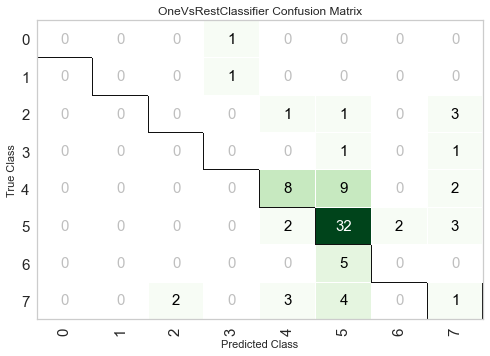

In [35]:
plot_model(knn, plot = 'confusion_matrix')

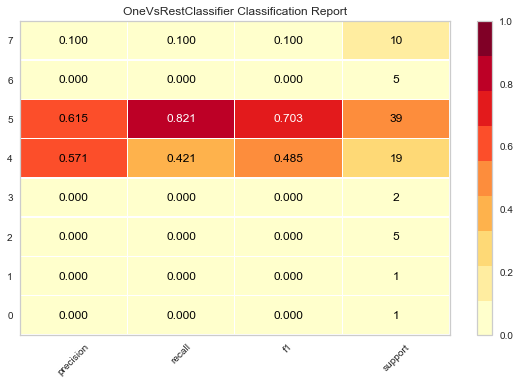

In [36]:
plot_model(knn, plot='class_report')

In [37]:
predict_model(knn)

Model  Accuracy  AUC  Recall   Prec.     F1   Kappa
0  One Vs Rest Classifier       0.5    0  0.1677  0.4373  0.459  0.2192

G         W     ADJOE     ADJDE   BARTHAG     EFG_O     EFG_D  \
0  -1.054873 -1.160609 -1.697894  0.420891 -1.408141 -1.224902  0.444983   
1   0.324576 -0.435450  0.639002  0.656856  0.262779 -0.013789  1.413617   
2  -1.054873 -0.435450 -1.619475  0.440555 -1.343565  0.689438 -0.391565   
3   0.324576  0.289708  0.435112 -1.348846  0.845699 -1.146766  0.048723   
4  -1.054873 -1.402328  0.168486  0.322572  0.171680 -1.068630  0.577069   
..       ...       ...       ...       ...       ...       ...       ...   
77  1.244209  1.014866  0.968364 -0.621287  0.805338  0.611302 -0.479623   
78  0.784393  1.014866  1.266357 -1.152208  0.952942  0.064348  0.268867   
79 -0.595057 -0.193731 -0.882333  0.755174 -0.871348  0.376893  0.885271   
80 -0.135240 -0.918889  0.262589  0.283245  0.243752 -0.209130 -0.435594   
81  0.324576  0.531427  0.780157  0.617528  0.345230  1.392666  0.709156   

         TOR      TORD       ORB  ...      2P_O      2P_D      3P_O      3P_D  \
0   0.815599  1.498370  0.208826  ... -0.565324  1.704780 -1.648464 -1.826822   
1  -0.022900 -0.182094 -0.227729  ... -0.148984  2.200678  0.088825 -0.478002   
2   1.414527 -1.420330 -1.173596  ...  1.204119 -0.739289 -0.274793  1.063506   
3   1.654099  2.736606  2.731140  ... -0.530629  0.146243 -1.486855 -0.140797   
4   0.336457  0.083243  0.136067  ... -0.912273 -0.030863 -0.638412  1.063506   
..       ...       ...       ...  ...       ...       ...       ...       ...   
77  0.635921 -0.491653  0.111814  ... -1.259223 -0.703868  2.432145  0.148236   
78 -0.022900 -0.226316  1.106187  ...  0.093880  0.217086  0.008021  0.051891   
79 -0.502043  0.967697 -1.876934  ... -0.218374  1.385988  0.775660 -0.285314   
80 -0.382257 -0.933880  0.330091  ... -0.842883 -0.243391  1.018073 -0.429830   
81  0.156778 -0.933880  0.596874  ...  1.689848  0.146243  0.290835  1.159850   

       ADJ_T       WAB      SEED  POSTSEASON  Label  Score  
0   0.738037 -1.542849  1.330227           5      5    1.0  
1   0.702595  0.354235  0.259115           4      5    0.4  
2  -0.431564 -1.023647  1.330227           5      5    1.0  
3   0.702595  1.192945 -1.240442           5      7    0.4  
4  -0.608776 -0.025182 -0.169330           5      5    0.8  
..       ...       ...       ...         ...    ...    ...  
77  0.667152  1.312761 -1.454665           3      7    0.4  
78  2.510160  1.712147 -1.668887           7      4    0.4  
79  0.844365 -0.544384  1.116004           5      6    0.4  
80  1.127904 -0.244844 -0.169330           5      5    0.4  
81 -0.218909  0.474051 -1.026220           5      5    0.4  

[82 rows x 23 columns]

### Building model using Support Vector Machine

In [38]:
svm = create_model('svm')

Accuracy  AUC  Recall   Prec.      F1   Kappa
0       0.6316  0.0  0.4537  0.5550  0.5825  0.4412
1       0.4211  0.0  0.1984  0.4189  0.4155  0.1804
2       0.5789  0.0  0.3815  0.5000  0.5305  0.3362
3       0.6842  0.0  0.7178  0.6778  0.6436  0.5289
4       0.4737  0.0  0.1847  0.5132  0.4612  0.2083
5       0.4211  0.0  0.2130  0.3114  0.3579  0.0793
6       0.5263  0.0  0.3786  0.5088  0.5167  0.3473
7       0.5263  0.0  0.2540  0.4628  0.4820  0.2875
8       0.3158  0.0  0.0833  0.3158  0.3158  0.0463
9       0.3158  0.0  0.1905  0.2895  0.2893  0.0536
Mean    0.4895  0.0  0.3055  0.4553  0.4595  0.2509
SD      0.1178  0.0  0.1740  0.1169  0.1094  0.1576

In [39]:
print(svm)

OneVsRestClassifier(estimator=SGDClassifier(alpha=0.0001, average=False,
                                            class_weight=None,
                                            early_stopping=False, epsilon=0.1,
                                            eta0=0.0, fit_intercept=True,
                                            l1_ratio=0.15,
                                            learning_rate='optimal',
                                            loss='hinge', max_iter=1000,
                                            n_iter_no_change=5, n_jobs=None,
                                            penalty='l2', power_t=0.5,
                                            random_state=123, shuffle=True,
                                            tol=0.001, validation_fraction=0.1,
                                            verbose=0, warm_start=False),
                    n_jobs=None)


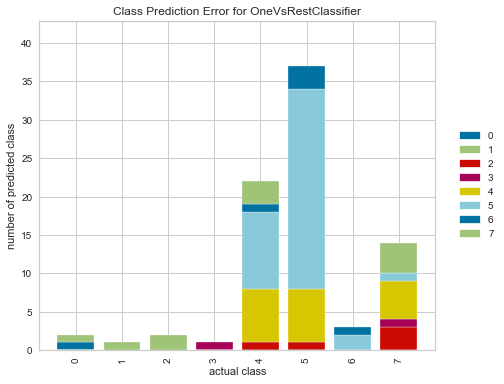

In [40]:
plot_model(svm, plot='error')

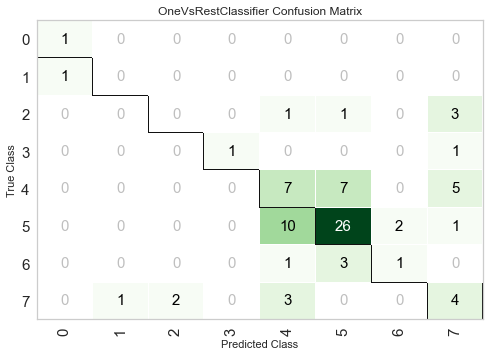

In [41]:
plot_model(svm, plot = 'confusion_matrix')

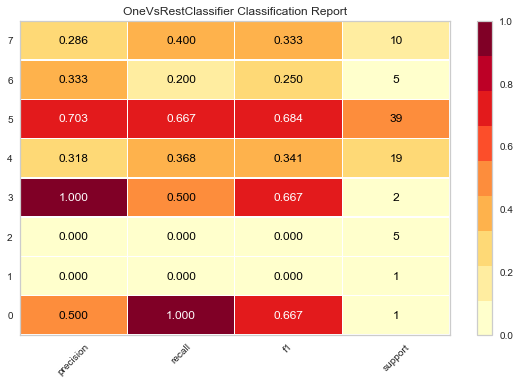

In [42]:
plot_model(svm, plot='class_report')

In [43]:
predict_model(svm)

Model  Accuracy  AUC  Recall   Prec.      F1   Kappa
0  One Vs Rest Classifier    0.4878    0  0.3919  0.4936  0.4848  0.2661

G         W     ADJOE     ADJDE   BARTHAG     EFG_O     EFG_D  \
0  -1.054873 -1.160609 -1.697894  0.420891 -1.408141 -1.224902  0.444983   
1   0.324576 -0.435450  0.639002  0.656856  0.262779 -0.013789  1.413617   
2  -1.054873 -0.435450 -1.619475  0.440555 -1.343565  0.689438 -0.391565   
3   0.324576  0.289708  0.435112 -1.348846  0.845699 -1.146766  0.048723   
4  -1.054873 -1.402328  0.168486  0.322572  0.171680 -1.068630  0.577069   
..       ...       ...       ...       ...       ...       ...       ...   
77  1.244209  1.014866  0.968364 -0.621287  0.805338  0.611302 -0.479623   
78  0.784393  1.014866  1.266357 -1.152208  0.952942  0.064348  0.268867   
79 -0.595057 -0.193731 -0.882333  0.755174 -0.871348  0.376893  0.885271   
80 -0.135240 -0.918889  0.262589  0.283245  0.243752 -0.209130 -0.435594   
81  0.324576  0.531427  0.780157  0.617528  0.345230  1.392666  0.709156   

         TOR      TORD       ORB  ...      FTRD      2P_O      2P_D      3P_O  \
0   0.815599  1.498370  0.208826  ...  0.089290 -0.565324  1.704780 -1.648464   
1  -0.022900 -0.182094 -0.227729  ... -0.665181 -0.148984  2.200678  0.088825   
2   1.414527 -1.420330 -1.173596  ... -0.790926  1.204119 -0.739289 -0.274793   
3   1.654099  2.736606  2.731140  ...  4.095168 -0.530629  0.146243 -1.486855   
4   0.336457  0.083243  0.136067  ...  0.071326 -0.912273 -0.030863 -0.638412   
..       ...       ...       ...  ...       ...       ...       ...       ...   
77  0.635921 -0.491653  0.111814  ... -0.754999 -1.259223 -0.703868  2.432145   
78 -0.022900 -0.226316  1.106187  ... -0.737035  0.093880  0.217086  0.008021   
79 -0.502043  0.967697 -1.876934  ... -0.287946 -0.218374  1.385988  0.775660   
80 -0.382257 -0.933880  0.330091  ... -0.754999 -0.842883 -0.243391  1.018073   
81  0.156778 -0.933880  0.596874  ... -0.234055  1.689848  0.146243  0.290835   

        3P_D     ADJ_T       WAB      SEED  POSTSEASON  Label  
0  -1.826822  0.738037 -1.542849  1.330227           5      5  
1  -0.478002  0.702595  0.354235  0.259115           4      5  
2   1.063506 -0.431564 -1.023647  1.330227           5      5  
3  -0.140797  0.702595  1.192945 -1.240442           5      5  
4   1.063506 -0.608776 -0.025182 -0.169330           5      5  
..       ...       ...       ...       ...         ...    ...  
77  0.148236  0.667152  1.312761 -1.454665           3      3  
78  0.051891  2.510160  1.712147 -1.668887           7      1  
79 -0.285314  0.844365 -0.544384  1.116004           5      5  
80 -0.429830  1.127904 -0.244844 -0.169330           5      5  
81  1.159850 -0.218909  0.474051 -1.026220           5      5  

[82 rows x 22 columns]

### Train a logistic regression model

In [44]:
lr = create_model('lr')

Accuracy  AUC  Recall   Prec.      F1   Kappa
0       0.6842  0.0  0.4722  0.6437  0.6244  0.4911
1       0.3684  0.0  0.1528  0.3110  0.3368  0.0339
2       0.5263  0.0  0.3630  0.4293  0.4719  0.2434
3       0.4211  0.0  0.3733  0.3202  0.3555  0.0913
4       0.4211  0.0  0.1270  0.2915  0.3445  0.0952
5       0.4211  0.0  0.1270  0.2707  0.3295  0.0543
6       0.4737  0.0  0.2000  0.3064  0.3647  0.1630
7       0.4737  0.0  0.1825  0.4018  0.4332  0.2116
8       0.3684  0.0  0.1111  0.2763  0.3158  0.0420
9       0.4737  0.0  0.1627  0.3336  0.3913  0.1441
Mean    0.4632  0.0  0.2272  0.3584  0.3968  0.1570
SD      0.0874  0.0  0.1208  0.1069  0.0889  0.1301

In [45]:
print(lr)

OneVsRestClassifier(estimator=LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='auto',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=123,
                                                 solver='lbfgs', tol=0.0001,
                                                 verbose=0, warm_start=False),
                    n_jobs=None)


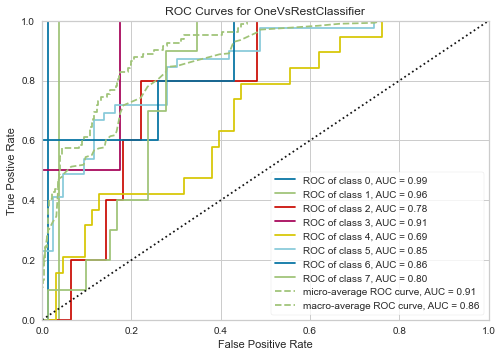

In [46]:
plot_model(lr)

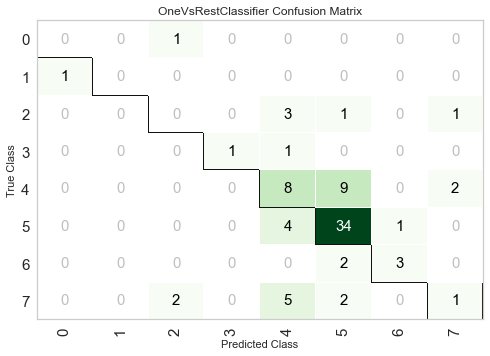

In [47]:
plot_model(lr, plot = 'confusion_matrix')

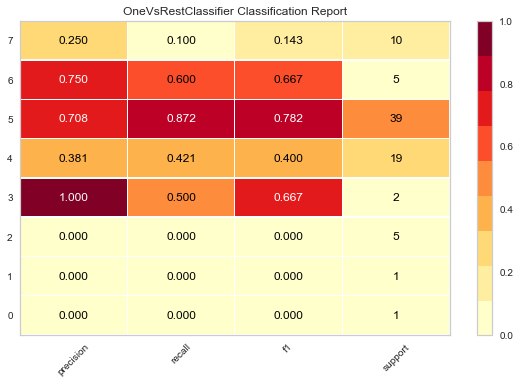

In [48]:
plot_model(lr, plot='class_report')

In [49]:
predict_model(lr)

Model  Accuracy  AUC  Recall   Prec.      F1  Kappa
0  One Vs Rest Classifier    0.5732    0  0.3116  0.5258  0.5388  0.344

G         W     ADJOE     ADJDE   BARTHAG     EFG_O     EFG_D  \
0  -1.054873 -1.160609 -1.697894  0.420891 -1.408141 -1.224902  0.444983   
1   0.324576 -0.435450  0.639002  0.656856  0.262779 -0.013789  1.413617   
2  -1.054873 -0.435450 -1.619475  0.440555 -1.343565  0.689438 -0.391565   
3   0.324576  0.289708  0.435112 -1.348846  0.845699 -1.146766  0.048723   
4  -1.054873 -1.402328  0.168486  0.322572  0.171680 -1.068630  0.577069   
..       ...       ...       ...       ...       ...       ...       ...   
77  1.244209  1.014866  0.968364 -0.621287  0.805338  0.611302 -0.479623   
78  0.784393  1.014866  1.266357 -1.152208  0.952942  0.064348  0.268867   
79 -0.595057 -0.193731 -0.882333  0.755174 -0.871348  0.376893  0.885271   
80 -0.135240 -0.918889  0.262589  0.283245  0.243752 -0.209130 -0.435594   
81  0.324576  0.531427  0.780157  0.617528  0.345230  1.392666  0.709156   

         TOR      TORD       ORB  ...      2P_O      2P_D      3P_O      3P_D  \
0   0.815599  1.498370  0.208826  ... -0.565324  1.704780 -1.648464 -1.826822   
1  -0.022900 -0.182094 -0.227729  ... -0.148984  2.200678  0.088825 -0.478002   
2   1.414527 -1.420330 -1.173596  ...  1.204119 -0.739289 -0.274793  1.063506   
3   1.654099  2.736606  2.731140  ... -0.530629  0.146243 -1.486855 -0.140797   
4   0.336457  0.083243  0.136067  ... -0.912273 -0.030863 -0.638412  1.063506   
..       ...       ...       ...  ...       ...       ...       ...       ...   
77  0.635921 -0.491653  0.111814  ... -1.259223 -0.703868  2.432145  0.148236   
78 -0.022900 -0.226316  1.106187  ...  0.093880  0.217086  0.008021  0.051891   
79 -0.502043  0.967697 -1.876934  ... -0.218374  1.385988  0.775660 -0.285314   
80 -0.382257 -0.933880  0.330091  ... -0.842883 -0.243391  1.018073 -0.429830   
81  0.156778 -0.933880  0.596874  ...  1.689848  0.146243  0.290835  1.159850   

       ADJ_T       WAB      SEED  POSTSEASON  Label   Score  
0   0.738037 -1.542849  1.330227           5      5  0.5709  
1   0.702595  0.354235  0.259115           4      5  0.4841  
2  -0.431564 -1.023647  1.330227           5      5  0.9327  
3   0.702595  1.192945 -1.240442           5      4  0.4727  
4  -0.608776 -0.025182 -0.169330           5      5  0.6393  
..       ...       ...       ...         ...    ...     ...  
77  0.667152  1.312761 -1.454665           3      3  0.4185  
78  2.510160  1.712147 -1.668887           7      7  0.4286  
79  0.844365 -0.544384  1.116004           5      5  0.7266  
80  1.127904 -0.244844 -0.169330           5      5  0.5505  
81 -0.218909  0.474051 -1.026220           5      5  0.4425  

[82 rows x 23 columns]

### Train a Gradient Booster model

In [50]:
gbc = create_model('gbc')

Accuracy  AUC  Recall   Prec.      F1   Kappa
0       0.5789  0.0  0.2870  0.4789  0.5176  0.3304
1       0.5263  0.0  0.3565  0.4211  0.4662  0.2565
2       0.5789  0.0  0.3667  0.4332  0.4797  0.3274
3       0.5263  0.0  0.4911  0.5000  0.5029  0.3105
4       0.5789  0.0  0.3270  0.5439  0.5451  0.3559
5       0.5789  0.0  0.4463  0.5158  0.5420  0.3667
6       0.7368  0.0  0.5857  0.8105  0.7471  0.6346
7       0.6316  0.0  0.6667  0.6491  0.6361  0.4845
8       0.3684  0.0  0.1865  0.3788  0.3695  0.1059
9       0.5789  0.0  0.2361  0.4912  0.5233  0.3532
Mean    0.5684  0.0  0.3950  0.5222  0.5330  0.3526
SD      0.0874  0.0  0.1447  0.1191  0.0959  0.1304

In [51]:
print(gbc)

OneVsRestClassifier(estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                         criterion='friedman_mse',
                                                         init=None,
                                                         learning_rate=0.1,
                                                         loss='deviance',
                                                         max_depth=3,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=

In [52]:
tuned_gbc = tune_model('gbc', optimize='Accuracy')

Accuracy  AUC  Recall   Prec.      F1   Kappa
0       0.6842  0.0  0.4722  0.6437  0.6244  0.4911
1       0.5263  0.0  0.3565  0.4143  0.4573  0.2400
2       0.5263  0.0  0.1714  0.4158  0.4305  0.2047
3       0.6316  0.0  0.3667  0.6378  0.5426  0.4062
4       0.5263  0.0  0.2857  0.3105  0.3904  0.2192
5       0.4737  0.0  0.2463  0.3991  0.4237  0.1775
6       0.5789  0.0  0.2667  0.4565  0.4962  0.3476
7       0.4211  0.0  0.1468  0.3315  0.3699  0.0991
8       0.3684  0.0  0.1111  0.3014  0.3316  0.0420
9       0.5789  0.0  0.3254  0.4860  0.5268  0.3770
Mean    0.5316  0.0  0.2749  0.4397  0.4593  0.2604
SD      0.0895  0.0  0.1056  0.1156  0.0844  0.1347

In [53]:
print(tuned_gbc)

OneVsRestClassifier(estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                         criterion='friedman_mse',
                                                         init=None,
                                                         learning_rate=0.02,
                                                         loss='deviance',
                                                         max_depth=60,
                                                         max_features='log2',
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=4,
                                                         min_samples_split=10,
                                                         min_weight_fraction_

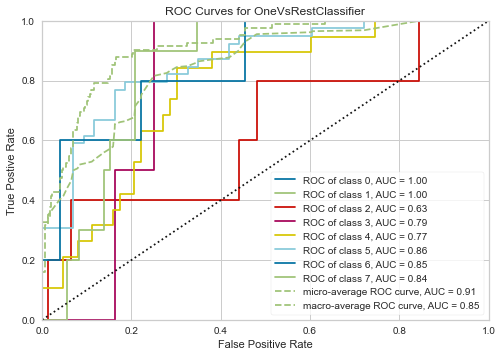

In [54]:
plot_model(tuned_gbc)

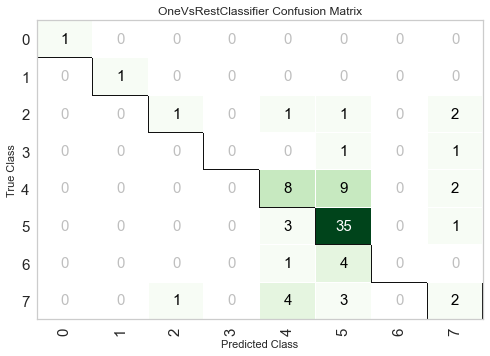

In [55]:
plot_model(tuned_gbc, plot = 'confusion_matrix')

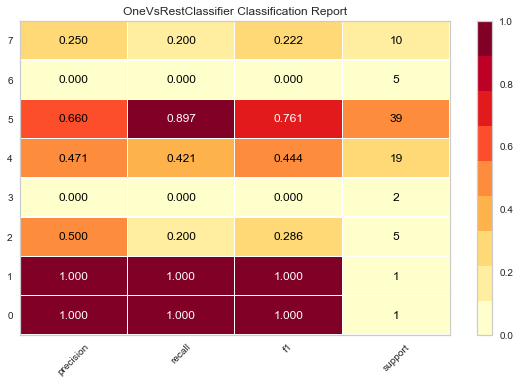

In [56]:
plot_model(tuned_gbc, plot='class_report')

In [57]:
predict_model(tuned_gbc)

Model  Accuracy  AUC  Recall   Prec.      F1   Kappa
0  One Vs Rest Classifier    0.5854    0  0.4648  0.5085  0.5338  0.3428

G         W     ADJOE     ADJDE   BARTHAG     EFG_O     EFG_D  \
0  -1.054873 -1.160609 -1.697894  0.420891 -1.408141 -1.224902  0.444983   
1   0.324576 -0.435450  0.639002  0.656856  0.262779 -0.013789  1.413617   
2  -1.054873 -0.435450 -1.619475  0.440555 -1.343565  0.689438 -0.391565   
3   0.324576  0.289708  0.435112 -1.348846  0.845699 -1.146766  0.048723   
4  -1.054873 -1.402328  0.168486  0.322572  0.171680 -1.068630  0.577069   
..       ...       ...       ...       ...       ...       ...       ...   
77  1.244209  1.014866  0.968364 -0.621287  0.805338  0.611302 -0.479623   
78  0.784393  1.014866  1.266357 -1.152208  0.952942  0.064348  0.268867   
79 -0.595057 -0.193731 -0.882333  0.755174 -0.871348  0.376893  0.885271   
80 -0.135240 -0.918889  0.262589  0.283245  0.243752 -0.209130 -0.435594   
81  0.324576  0.531427  0.780157  0.617528  0.345230  1.392666  0.709156   

         TOR      TORD       ORB  ...      2P_O      2P_D      3P_O      3P_D  \
0   0.815599  1.498370  0.208826  ... -0.565324  1.704780 -1.648464 -1.826822   
1  -0.022900 -0.182094 -0.227729  ... -0.148984  2.200678  0.088825 -0.478002   
2   1.414527 -1.420330 -1.173596  ...  1.204119 -0.739289 -0.274793  1.063506   
3   1.654099  2.736606  2.731140  ... -0.530629  0.146243 -1.486855 -0.140797   
4   0.336457  0.083243  0.136067  ... -0.912273 -0.030863 -0.638412  1.063506   
..       ...       ...       ...  ...       ...       ...       ...       ...   
77  0.635921 -0.491653  0.111814  ... -1.259223 -0.703868  2.432145  0.148236   
78 -0.022900 -0.226316  1.106187  ...  0.093880  0.217086  0.008021  0.051891   
79 -0.502043  0.967697 -1.876934  ... -0.218374  1.385988  0.775660 -0.285314   
80 -0.382257 -0.933880  0.330091  ... -0.842883 -0.243391  1.018073 -0.429830   
81  0.156778 -0.933880  0.596874  ...  1.689848  0.146243  0.290835  1.159850   

       ADJ_T       WAB      SEED  POSTSEASON  Label   Score  
0   0.738037 -1.542849  1.330227           5      5  0.6738  
1   0.702595  0.354235  0.259115           4      5  0.5482  
2  -0.431564 -1.023647  1.330227           5      5  0.8822  
3   0.702595  1.192945 -1.240442           5      7  0.3977  
4  -0.608776 -0.025182 -0.169330           5      5  0.8565  
..       ...       ...       ...         ...    ...     ...  
77  0.667152  1.312761 -1.454665           3      7  0.5594  
78  2.510160  1.712147 -1.668887           7      2  0.4927  
79  0.844365 -0.544384  1.116004           5      5  0.7843  
80  1.127904 -0.244844 -0.169330           5      5  0.7138  
81 -0.218909  0.474051 -1.026220           5      5  0.6251  

[82 rows x 23 columns]